In [1]:
pip install pandas numpy opencv-python matplotlib scikit-image scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix
from skimage.feature import graycoprops
from skimage.color import rgb2gray
from sklearn.preprocessing import LabelEncoder


Iniziamo provando a visualizzare il colore medio per le varie classi

In [ ]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

# Carica i CSV
train_small_df = pd.read_csv('dataset/train_small.csv', header=None, names=["Image", "Label"])
val_info_df = pd.read_csv('dataset/val_info.csv', header=None, names=["Image", "Label"])

# Funzione per estrarre la media dei colori
def extract_color_features(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converti da BGR a RGB
    mean_color = np.mean(image, axis=(0, 1))  # Media per ogni canale
    return mean_color

# Seleziona un'immagine per ogni classe e crea la visualizzazione
classes = train_small_df['Label'].unique()
output_dir = "output_images/average_color/"

train_means = []
val_means = []

for class_label in classes:
    # Seleziona un'immagine da train_small e una da val_info
    train_image_path = "dataset/train_set/" + train_small_df[train_small_df['Label'] == class_label]['Image'].iloc[0]
    val_image_path = "dataset/val_set/" + val_info_df[val_info_df['Label'] == class_label]['Image'].iloc[0]

    # Calcola la media dei colori
    train_mean_color = extract_color_features(train_image_path)
    val_mean_color = extract_color_features(val_image_path)

    train_means.append(train_mean_color)
    val_means.append(val_mean_color)

    # Crea i quadratini di colore medio
    train_color_patch = np.ones((100, 100, 3), dtype=np.uint8)
    val_color_patch = np.ones((100, 100, 3), dtype=np.uint8)
    train_color_patch[:, :, 0] = train_mean_color[0]
    train_color_patch[:, :, 1] = train_mean_color[1]
    train_color_patch[:, :, 2] = train_mean_color[2]
    val_color_patch[:, :, 0] = val_mean_color[0]
    val_color_patch[:, :, 1] = val_mean_color[1]
    val_color_patch[:, :, 2] = val_mean_color[2]

    # Carica le immagini originali
    train_image = cv2.cvtColor(cv2.imread(train_image_path), cv2.COLOR_BGR2RGB)
    val_image = cv2.cvtColor(cv2.imread(val_image_path), cv2.COLOR_BGR2RGB)

    # Mostra tutto insieme
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes[0, 0].imshow(train_image)
    axes[0, 0].set_title(f'Train Image - Class {class_label}')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(train_color_patch / 255)
    axes[0, 1].set_title('Train Mean Color')
    axes[0, 1].axis('off')

    axes[1, 0].imshow(val_image)
    axes[1, 0].set_title(f'Validation Image - Class {class_label}')
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(val_color_patch / 255)
    axes[1, 1].set_title('Validation Mean Color')
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.savefig(f"{output_dir}class_{class_label}.png")
    plt.close(fig)


KeyboardInterrupt: 

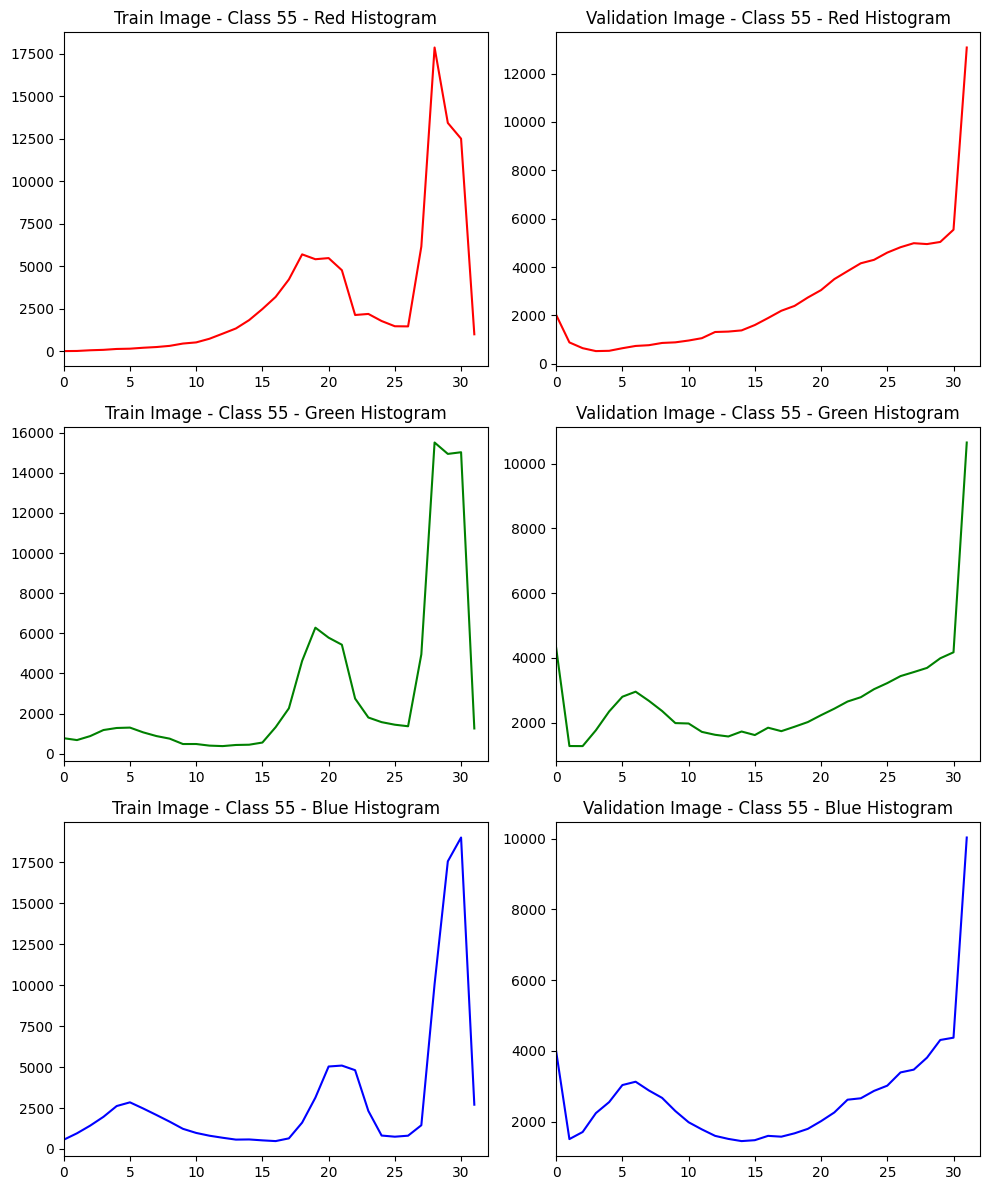

In [27]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

# Carica i CSV
train_small_df = pd.read_csv('dataset/train_small.csv', header=None, names=["Image", "Label"])
val_info_df = pd.read_csv('dataset/val_info.csv', header=None, names=["Image", "Label"])

# Funzione per estrarre l'istogramma dei colori
def extract_color_histogram(image_path, bins=32):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converti da BGR a RGB
    # Calcola l'istogramma per ciascun canale (R, G, B)
    hist_r = cv2.calcHist([image], [0], None, [bins], [0, 256])
    hist_g = cv2.calcHist([image], [1], None, [bins], [0, 256])
    hist_b = cv2.calcHist([image], [2], None, [bins], [0, 256])
    return hist_r, hist_g, hist_b

# Seleziona un'immagine per ogni classe e crea la visualizzazione
classes = train_small_df['Label'].unique()
output_dir = "output_images/histogram_color/"

train_histograms = []
val_histograms = []

for class_label in classes:
    # Seleziona un'immagine da train_small e una da val_info
    train_image_path = "dataset/train_set/" + train_small_df[train_small_df['Label'] == class_label]['Image'].iloc[0]
    val_image_path = "dataset/val_set/" + val_info_df[val_info_df['Label'] == class_label]['Image'].iloc[0]

    # Calcola gli istogrammi dei colori
    train_hist_r, train_hist_g, train_hist_b = extract_color_histogram(train_image_path)
    val_hist_r, val_hist_g, val_hist_b = extract_color_histogram(val_image_path)

    train_histograms.append((train_hist_r, train_hist_g, train_hist_b))
    val_histograms.append((val_hist_r, val_hist_g, val_hist_b))

    # Mostra gli istogrammi uno sopra l'altro
    fig, axes = plt.subplots(3, 2, figsize=(10, 12))

    # Istogrammi per l'immagine di training
    axes[0, 0].plot(train_hist_r, color='red')
    axes[0, 0].set_title(f'Train Image - Class {class_label} - Red Histogram')
    axes[0, 0].set_xlim([0, 32])

    axes[1, 0].plot(train_hist_g, color='green')
    axes[1, 0].set_title(f'Train Image - Class {class_label} - Green Histogram')
    axes[1, 0].set_xlim([0, 32])

    axes[2, 0].plot(train_hist_b, color='blue')
    axes[2, 0].set_title(f'Train Image - Class {class_label} - Blue Histogram')
    axes[2, 0].set_xlim([0, 32])

    # Istogrammi per l'immagine di validation
    axes[0, 1].plot(val_hist_r, color='red')
    axes[0, 1].set_title(f'Validation Image - Class {class_label} - Red Histogram')
    axes[0, 1].set_xlim([0, 32])

    axes[1, 1].plot(val_hist_g, color='green')
    axes[1, 1].set_title(f'Validation Image - Class {class_label} - Green Histogram')
    axes[1, 1].set_xlim([0, 32])

    axes[2, 1].plot(val_hist_b, color='blue')
    axes[2, 1].set_title(f'Validation Image - Class {class_label} - Blue Histogram')
    axes[2, 1].set_xlim([0, 32])

    # Regola il layout per non sovrapporre i titoli
    plt.tight_layout()
    plt.savefig(f"{output_dir}class_{class_label}_histograms.png")
    plt.close(fig)


In [31]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

# Carica i CSV
train_small_df = pd.read_csv('dataset/train_small.csv', header=None, names=["Image", "Label"])
val_info_df = pd.read_csv('dataset/val_info.csv', header=None, names=["Image", "Label"])

# Funzione per estrarre la media dei colori
def extract_color_features_with_ellipse(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converti da BGR a RGB
    
    # Ottieni le dimensioni dell'immagine
    height, width, _ = image.shape

    # Crea una maschera ellittica (ellisse centrata)
    Y, X = np.ogrid[:height, :width]
    center = (width // 2, height // 2)
    axes = (width // 4, height // 4)  # Definisci le dimensioni dell'ellisse
    mask = ((X - center[0])**2 / axes[0]**2 + (Y - center[1])**2 / axes[1]**2) <= 1

    # Estrai i pixel all'interno dell'ellisse
    masked_pixels = image[mask]

    # Calcola la media dei colori nella regione ellittica
    mean_color = np.mean(masked_pixels, axis=0)
    return mean_color


# Seleziona un'immagine per ogni classe e crea la visualizzazione
classes = train_small_df['Label'].unique()
output_dir = "output_images/average_color_ellipse/"

train_means = []
val_means = []

for class_label in classes:
    # Seleziona un'immagine da train_small e una da val_info
    train_image_path = "dataset/train_set/" + train_small_df[train_small_df['Label'] == class_label]['Image'].iloc[0]
    val_image_path = "dataset/val_set/" + val_info_df[val_info_df['Label'] == class_label]['Image'].iloc[0]

    # Calcola la media dei colori
    train_mean_color = extract_color_features_with_ellipse(train_image_path)
    val_mean_color = extract_color_features_with_ellipse(val_image_path)

    train_means.append(train_mean_color)
    val_means.append(val_mean_color)

    # Crea i quadratini di colore medio
    train_color_patch = np.ones((100, 100, 3), dtype=np.uint8)
    val_color_patch = np.ones((100, 100, 3), dtype=np.uint8)
    train_color_patch[:, :, 0] = train_mean_color[0]
    train_color_patch[:, :, 1] = train_mean_color[1]
    train_color_patch[:, :, 2] = train_mean_color[2]
    val_color_patch[:, :, 0] = val_mean_color[0]
    val_color_patch[:, :, 1] = val_mean_color[1]
    val_color_patch[:, :, 2] = val_mean_color[2]

    # Carica le immagini originali
    train_image = cv2.cvtColor(cv2.imread(train_image_path), cv2.COLOR_BGR2RGB)
    val_image = cv2.cvtColor(cv2.imread(val_image_path), cv2.COLOR_BGR2RGB)

    # Mostra tutto insieme
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes[0, 0].imshow(train_image)
    axes[0, 0].set_title(f'Train Image - Class {class_label}')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(train_color_patch / 255)
    axes[0, 1].set_title('Train Mean Color')
    axes[0, 1].axis('off')

    axes[1, 0].imshow(val_image)
    axes[1, 0].set_title(f'Validation Image - Class {class_label}')
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(val_color_patch / 255)
    axes[1, 1].set_title('Validation Mean Color')
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.savefig(f"{output_dir}class_{class_label}.png")
    plt.close(fig)


In [34]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

# Carica i CSV
train_small_df = pd.read_csv('dataset/train_small.csv', header=None, names=["Image", "Label"])
val_info_df = pd.read_csv('dataset/val_info.csv', header=None, names=["Image", "Label"])

# Funzione per estrarre l'istogramma dei colori

def extract_color_histogram_with_ellipse(image_path, bins=32):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    
    # Get the dimensions of the image
    height, width, _ = image.shape

    # Create an elliptical mask (centered ellipse)
    Y, X = np.ogrid[:height, :width]
    center = (width // 2, height // 2)
    axes = (width // 4, height // 4)  # Define the size of the ellipse
    mask = ((X - center[0])**2 / axes[0]**2 + (Y - center[1])**2 / axes[1]**2) <= 1

    # Apply the mask to get the pixels inside the ellipse
    masked_image = image[mask]
    
    # Separate the image into the individual R, G, B channels
    r_channel = masked_image[:, 0]  # Red channel
    g_channel = masked_image[:, 1]  # Green channel
    b_channel = masked_image[:, 2]  # Blue channel

    # Calculate the histogram for each channel (R, G, B)
    hist_r = cv2.calcHist([r_channel], [0], None, [bins], [0, 256])
    hist_g = cv2.calcHist([g_channel], [0], None, [bins], [0, 256])
    hist_b = cv2.calcHist([b_channel], [0], None, [bins], [0, 256])

    return hist_r, hist_g, hist_b

# Seleziona un'immagine per ogni classe e crea la visualizzazione
classes = train_small_df['Label'].unique()
output_dir = "output_images/histogram_color_with_ellipse/"

train_histograms = []
val_histograms = []

for class_label in classes:
    # Seleziona un'immagine da train_small e una da val_info
    train_image_path = "dataset/train_set/" + train_small_df[train_small_df['Label'] == class_label]['Image'].iloc[0]
    val_image_path = "dataset/val_set/" + val_info_df[val_info_df['Label'] == class_label]['Image'].iloc[0]

    # Calcola gli istogrammi dei colori
    train_hist_r, train_hist_g, train_hist_b = extract_color_histogram_with_ellipse(train_image_path)
    val_hist_r, val_hist_g, val_hist_b = extract_color_histogram_with_ellipse(val_image_path)

    train_histograms.append((train_hist_r, train_hist_g, train_hist_b))
    val_histograms.append((val_hist_r, val_hist_g, val_hist_b))

    # Mostra gli istogrammi uno sopra l'altro
    fig, axes = plt.subplots(3, 2, figsize=(10, 12))

    # Istogrammi per l'immagine di training
    axes[0, 0].plot(train_hist_r, color='red')
    axes[0, 0].set_title(f'Train Image - Class {class_label} - Red Histogram')
    axes[0, 0].set_xlim([0, 32])

    axes[1, 0].plot(train_hist_g, color='green')
    axes[1, 0].set_title(f'Train Image - Class {class_label} - Green Histogram')
    axes[1, 0].set_xlim([0, 32])

    axes[2, 0].plot(train_hist_b, color='blue')
    axes[2, 0].set_title(f'Train Image - Class {class_label} - Blue Histogram')
    axes[2, 0].set_xlim([0, 32])

    # Istogrammi per l'immagine di validation
    axes[0, 1].plot(val_hist_r, color='red')
    axes[0, 1].set_title(f'Validation Image - Class {class_label} - Red Histogram')
    axes[0, 1].set_xlim([0, 32])

    axes[1, 1].plot(val_hist_g, color='green')
    axes[1, 1].set_title(f'Validation Image - Class {class_label} - Green Histogram')
    axes[1, 1].set_xlim([0, 32])

    axes[2, 1].plot(val_hist_b, color='blue')
    axes[2, 1].set_title(f'Validation Image - Class {class_label} - Blue Histogram')
    axes[2, 1].set_xlim([0, 32])

    # Regola il layout per non sovrapporre i titoli
    plt.tight_layout()
    plt.savefig(f"{output_dir}class_{class_label}_histograms.png")
    plt.close(fig)


In [1]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

# Carica i CSV
train_small_df = pd.read_csv('dataset/train_small.csv', header=None, names=["Image", "Label"])
val_info_df = pd.read_csv('dataset/val_info.csv', header=None, names=["Image", "Label"])

# Funzione per estrarre l'istogramma dei colori

def extract_color_histogram_with_ellipse(image_path, bins=32):
    image = cv2.imread(image_path)
    # LAB color space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    
    # Get the dimensions of the image
    height, width, _ = image.shape

    # Create an elliptical mask (centered ellipse)
    Y, X = np.ogrid[:height, :width]
    center = (width // 2, height // 2)
    axes = (width // 4, height // 4)  # Define the size of the ellipse
    mask = ((X - center[0])**2 / axes[0]**2 + (Y - center[1])**2 / axes[1]**2) <= 1

    # Apply the mask to get the pixels inside the ellipse
    masked_image = image[mask]
    
    # Separate the image into the individual L, A, B channels
    l_channel = masked_image[:, 0]  # L channel
    a_channel = masked_image[:, 1]  # A channel
    b_channel = masked_image[:, 2]  # B channel

    # Calculate the histogram for each channel (L, A, B)
    hist_l = cv2.calcHist([l_channel], [0], None, [bins], [0, 256])
    hist_a = cv2.calcHist([a_channel], [0], None, [bins], [0, 256])
    hist_b = cv2.calcHist([b_channel], [0], None, [bins], [0, 256])

    return hist_l, hist_a, hist_b

# Seleziona un'immagine per ogni classe e crea la visualizzazione
classes = train_small_df['Label'].unique()
output_dir = "output_images/histogram_color_with_ellipse/"

train_histograms = []
val_histograms = []

for class_label in classes:
    # Seleziona un'immagine da train_small e una da val_info
    train_image_path = "dataset/train_set/" + train_small_df[train_small_df['Label'] == class_label]['Image'].iloc[0]
    val_image_path = "dataset/val_set/" + val_info_df[val_info_df['Label'] == class_label]['Image'].iloc[0]

    # Calcola gli istogrammi dei colori
    train_hist_l, train_hist_a, train_hist_b = extract_color_histogram_with_ellipse(train_image_path)
    val_hist_l, val_hist_a, val_hist_b = extract_color_histogram_with_ellipse(val_image_path)

    train_histograms.append((train_hist_l, train_hist_a, train_hist_b))
    val_histograms.append((val_hist_l, val_hist_a, val_hist_b))

    # Mostra gli istogrammi uno sopra l'altro
    fig, axes = plt.subplots(3, 2, figsize=(10, 12))

    # Istogrammi per l'immagine di training
    axes[0, 0].plot(train_hist_l, color='black')
    axes[0, 0].set_title(f'Train Image - Class {class_label} - Luminescence Histogram')
    axes[0, 0].set_xlim([0, 32])

    axes[1, 0].plot(train_hist_a, color='green')
    axes[1, 0].set_title(f'Train Image - Class {class_label} - A axis Histogram')
    axes[1, 0].set_xlim([0, 32])

    axes[2, 0].plot(train_hist_b, color='blue')
    axes[2, 0].set_title(f'Train Image - Class {class_label} - B axis Histogram')
    axes[2, 0].set_xlim([0, 32])

    # Istogrammi per l'immagine di validation
    axes[0, 1].plot(val_hist_a, color='black')
    axes[0, 1].set_title(f'Validation Image - Class {class_label} - Luminescence Histogram')
    axes[0, 1].set_xlim([0, 32])
    
    axes[1, 1].plot(val_hist_a, color='green')
    axes[1, 1].set_title(f'Validation Image - Class {class_label} - A axis Histogram')
    axes[1, 1].set_xlim([0, 32])
    
    axes[2, 1].plot(val_hist_b, color='blue')
    axes[2, 1].set_title(f'Validation Image - Class {class_label} - B axis Histogram')
    axes[2, 1].set_xlim([0, 32])

    # Regola il layout per non sovrapporre i titoli
    plt.tight_layout()
    plt.savefig(f"{output_dir}class_{class_label}_histograms.png")
    plt.close(fig)
